In [39]:
import tensorflow as tf

In [40]:
from tensorflow.keras.layers import Input,Conv2D,BatchNormalization,ReLU,DepthwiseConv2D,GlobalAveragePooling2D,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model

DEFINING RELU6 ACTIVATION

In [41]:
relu6 = ReLU(max_value=6,name='ReLU6')

IMPORTING IMAGES

In [42]:
train_path='PandasBears/Train'
test_path='PandasBears/Test'

datagen=ImageDataGenerator(
    rescale = 1/255.0
)

train_generator=datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=16,
    class_mode='binary'
)

test_generator=datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=16,
    class_mode='binary'
)

Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [43]:
input_shape=train_generator.image_shape
print(input_shape)

(224, 224, 3)


DEFINING COMPONENTS OF MOBILENETV2 ARCHETECTURE

In [44]:
def conv_block(inputs,num_filters,kernel_size,strides):
    x=Conv2D(num_filters,kernel_size,strides=strides,padding='same')(inputs)
    x=BatchNormalization()(x)
    x=relu6(x)
    return x

def bottleneck(inputs,num_filters,kernel_size,strides,expansion):
    
    # Expansion Phase
    x=Conv2D(expansion*num_filters,(1,1),strides=(1,1),padding='same')(inputs)
    x=BatchNormalization()(x)
    x=relu6(x)

    # Depth Wise Convolution
    x=DepthwiseConv2D(kernel_size,strides=strides,padding='same')(x)
    x=BatchNormalization()(x)
    x=relu6(x)

    # Pointwise Convolution
    x=Conv2D(num_filters,(1,1),strides=(1,1),padding='same')(x)
    x=BatchNormalization()(x)

    if strides==(1,1) and inputs.shape[-1]==num_filters:
        return tf.keras.layers.Add()([inputs,x])
    return x




DEFINING MOBILENET V2 ARCHETECTURE

In [45]:
# def mobilenetv2(input_shape, num_classes):
#     input_tensor=Input(shape=input_shape)

#     x=conv_block(input_tensor,32,(3,3),(2,2))

#     x=bottleneck(x,16,(3,3),(1,1),1)

#     for i in range(2):
#         x=bottleneck(x,24,(3,3),(2,2),6)

#     for i in range(3):
#         x=bottleneck(x,32,(3,3),(2,2),6)

#     for i in range(4):
#         x=bottleneck(x,64,(3,3),(2,2),6)

#     for i in range(3):
#         x=bottleneck(x,96,(3,3),(1,1),6)

#     for i in range(3):
#         x=bottleneck(x,160,(3,3),(2,2),6)

#     x=bottleneck(x,320,(3,3),(1,1),6)

#     x=conv_block(x,1280,(1,1),(1,1))

#     x=GlobalAveragePooling2D()(x)

#     x=Dense(num_classes,activation='softmax')(x)

#     model=Model(inputs=input_tensor,outputs=x)    
#     return model

    

In [46]:
def mobilenetv2(input_shape, num_classes):
    input_tensor=Input(shape=input_shape)

    x=conv_block(input_tensor,32,(3,3),(2,2))

    x=bottleneck(x,16,(3,3),(1,1),1)
    x=bottleneck(x,24,(3,3),(2,2),6)
    x=bottleneck(x,32,(3,3),(2,2),6)
    x=bottleneck(x,64,(3,3),(2,2),6)
    x=bottleneck(x,96,(3,3),(1,1),6)
    x=bottleneck(x,160,(3,3),(2,2),6)
    x=bottleneck(x,320,(3,3),(1,1),6)

    x=conv_block(x,1280,(1,1),(1,1))
    x=GlobalAveragePooling2D()(x)
    x=Dense(num_classes,activation='softmax')(x)

    model=Model(inputs=input_tensor,outputs=x)    
    return model

    

In [47]:
model=mobilenetv2(input_shape,2)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_72 (Conv2D)          (None, 112, 112, 32)         896       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_106 (B  (None, 112, 112, 32)         128       ['conv2d_72[0][0]']           
 atchNormalization)                                                                               
                                                                                                  
 ReLU6 (ReLU)                multiple                     0         ['batch_normalization_10

COMPILE THE MODEL

In [48]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

TRAIN THE MODEL

In [49]:
history = model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=len(train_generator),
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

Epoch 1/10
32/32 [==============================] - 15s 443ms/step - loss: 0.1420 - accuracy: 0.9320 - val_loss: 0.8569 - val_accuracy: 0.5000
Epoch 2/10
32/32 [==============================] - 13s 421ms/step - loss: 0.0437 - accuracy: 0.9820 - val_loss: 0.8408 - val_accuracy: 0.5000
Epoch 3/10
32/32 [==============================] - 14s 425ms/step - loss: 0.0147 - accuracy: 0.9940 - val_loss: 0.8672 - val_accuracy: 0.5000
Epoch 4/10
32/32 [==============================] - 14s 442ms/step - loss: 0.0350 - accuracy: 0.9940 - val_loss: 0.7233 - val_accuracy: 0.5000
Epoch 5/10
32/32 [==============================] - 14s 445ms/step - loss: 0.0177 - accuracy: 0.9940 - val_loss: 0.7179 - val_accuracy: 0.5000
Epoch 6/10
32/32 [==============================] - 14s 426ms/step - loss: 0.0073 - accuracy: 0.9960 - val_loss: 0.7729 - val_accuracy: 0.5000
Epoch 7/10
32/32 [==============================] - 14s 430ms/step - loss: 0.0234 - accuracy: 0.9940 - val_loss: 0.6968 - val_accuracy: 0.5000

PLOTING ACCURACY AND LOSS GRAPH

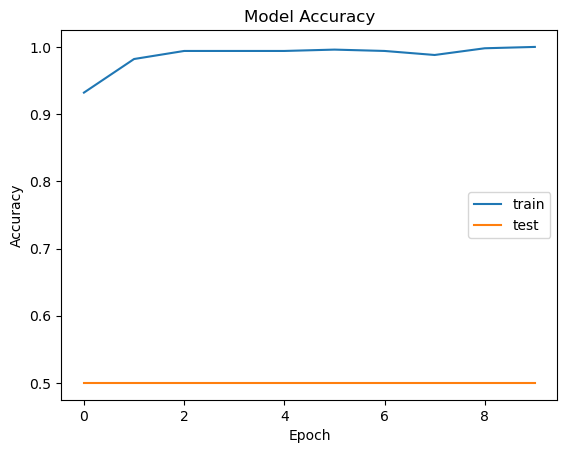

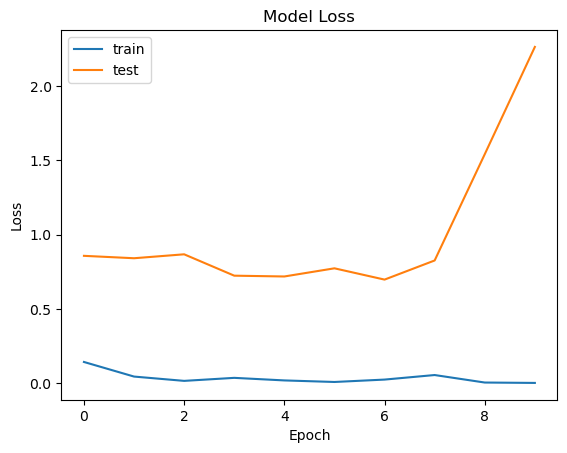

In [50]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend(['train','test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend(['train','test'])
plt.show()